In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import datetime as dt
from datetime import datetime
#file_name = "trabajo final\obras_paralizadas_limpio.csv" # File name
file_name = "data\Data_TFML_3.csv" # File name
#sheet_name = 3 # 4th sheet
header = 1 # The header is the 2nd row
df = pd.read_csv(file_name)
#df['Fecha de creación'] = pd.to_datetime(df['Fecha de creación']).dt.date
#df['Fecha de creación']=datetime.strptime(df['Fecha de creación'], '%d/%m/%y')
#df['Fecha de creación']=df['Fecha de creación'].to_string()
#df['Fecha de creación'].to_string()
#df = pd.read_csv(file_name = file_name, sheet_name = sheet_name, header = header)
#df.info()
#df = df.drop(columns=['Unnamed: 0'])

df

,RANGO_DE_INVERSION,trimestre,avance_fisico,NIVEL_DE_GOBIERNO_d,Regeion_centro,Regeion_nortye,Regeion_oriente,Regeion_centro.1,CAUSAL_PARALIZACION
0,4,1,4,1,0,1,0,0,3
1,4,2,4,1,1,0,0,0,3
2,4,3,4,3,0,0,0,1,1
3,4,3,2,1,0,0,0,1,2
4,4,2,4,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
13751,7,3,3,3,1,0,0,0,1
13752,7,3,1,3,0,1,0,0,3
13753,7,1,1,3,0,1,0,0,3
13754,7,1,1,3,0,1,0,0,3


In [14]:
df['CAUSAL_PARALIZACION'] = df['CAUSAL_PARALIZACION'].astype('category')


In [15]:
df.describe() #13756

,RANGO_DE_INVERSION,trimestre,avance_fisico,NIVEL_DE_GOBIERNO_d,Regeion_centro,Regeion_nortye,Regeion_oriente,Regeion_centro.1
count,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000,13756.000000
mean,2.181884,2.736769,2.629762,1.437264,0.292018,0.178976,0.078729,0.450276
std,1.192334,1.092715,1.089835,0.755200,0.454707,0.383347,0.269326,0.497539
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,7.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

# Preprocess the data
X = df.drop('CAUSAL_PARALIZACION', axis=1)
y = df['CAUSAL_PARALIZACION']

# Standardize the features
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use fit_transform on your training dataset when preprocessing your features. This ensures that the scaler
# learns the required parameters (like the mean and standard deviation) only from the training data to avoid data leakage.
X_train_scaled = scaler.fit_transform(X_train)

# Applies the transformation using the parameters learned during fit (e.g., mean and standard deviation) without recalculating them.
X_test_scaled = scaler.transform(X_test)

# Convert string labels to numeric labels
#y_train = y_train.map({'tested_negative': 0, 'tested_positive': 1})
#y_test = y_test.map({'tested_negative': 0, 'tested_positive': 1})

# Define the SVM kernels
kernels = ['rbf']
#kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [17]:
import pandas as pd
import pickle

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Kernel', 'Accuracy', 'Precision', 'Recall', 'AUROC', 'F1-Score'])

# Train an SVM model for each kernel
for kernel in kernels:
  svm = SVC(kernel=kernel, C=0.5, gamma=0.5,probability=True )
  svm.fit(X_train_scaled, y_train)

  # Make predictions on the test set
  y_pred = svm.predict(X_test_scaled)

  # Calculate the performance metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred,average='micro')
  recall = recall_score(y_test, y_pred,average='micro')
  #auroc = roc_auc_score(y_test, y_pred,multi_class='ovr')
  f1 = f1_score(y_test, y_pred,average='micro')

  # Save the model to a file
  filename = f'svm_{kernel}.sav'
  pickle.dump(svm, open(filename, 'wb'))

  # Add the results to the DataFrame using pd.concat
  results = pd.concat([results, pd.DataFrame({'Kernel': [kernel], 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1-Score': [f1]})], ignore_index=True)

# Print the results table
print(results.to_string())

  Kernel  Accuracy  Precision    Recall AUROC  F1-Score
0    rbf  0.582122   0.582122  0.582122   NaN  0.582122


In [18]:
tabla_doble_entrada2 = pd.crosstab(y_pred, y_test)
print(tabla_doble_entrada2)


CAUSAL_PARALIZACION    1    2     3
row_0                              
1                    265   22   147
2                     23  193   151
3                    425  382  1144


In [42]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Identify numeric columns
numeric_cols = df.select_dtypes(exclude=['category']).columns
numeric_cols

Index(['EVENTO', 'MODALIDAD DE EJECUCIÓN', 'COSTO DE OBRA SEGÚN EXP. TEC.',
       'COSTO ACTUALIZADO', 'RANGO DE INVERSION', 'RANGO DE INVERSIÓN 2',
       'SALDO DE INVERSION (Costo Act. - Dev. Acum.)', 'TIPO DE OBRA',
       'DEPARTAMENTO', 'AÑO INICIO OBRA', 'PLAZO DE EJECUCIÓN',
       'AVANCE FÍSICO', 'RANGO AVANCE FÍSICO', 'NIVEL DE GOBIERNO', 'SECTOR',
       'APLICACIÓN PARA LEY 31589',
       'ESTA EN EL INVENTARIO OBRAS PARALIZADAS MEF'],
      dtype='object')

In [31]:
import pygwalker as pyg
pyg.walk(df,hideDataSourceConfig=True, vegaTheme='vega')

Box(children=(HTML(value='\n<div id="ifr-pyg-00062ae9b0738e64fHOqT9w38esFK1SG" style="height: auto">\n    <hea…

In [ ]:
# Handle numeric columns (example: drop them)
df_no_numeric = df.drop(numeric_cols, axis=1)

# Define the imputer
imputer = IterativeImputer(estimator=RandomForestRegressor())

# Impute missing values in the numeric DataFrame
df_imputed = imputer.fit_transform(df_no_numeric)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df_no_numeric.columns)

# Print the imputed DataFrame
print(df_imputed)

In [20]:
pip install pygwalker

   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.5 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.5 MB ? eta -:--:--
   -- ----------------------------

In [44]:
import pygwalker as pyg
pyg.walk(df,hideDataSourceConfig=True, vegaTheme='vega')

Box(children=(HTML(value='\n<div id="ifr-pyg-00062ae9c756998fSXl5iBDH6nqhQkKC" style="height: auto">\n    <hea…

In [ ]:
df_imputed['CAUSAL PARALIZACION'] = df['CAUSAL PARALIZACION']

df = df_imputed

print(df)

In [43]:
#import bnlearn as bn
#from sklearn.preprocessing import OneHotEncoder

# Pre-processing of the input dataset
#preg   plas  pres  skin   insu    mass   pedi   age

# Convert the target variable to numeric (0 and 1)
df['CAUSAL PARALIZACION'] = df['CAUSAL PARALIZACION'].map({'Incumplimiento de contrato': '1', 'Otros': '0'})

print(df)

##dfhot, dfnum = bn.df2onehot(df)

       EVENTO  MODALIDAD DE EJECUCIÓN  COSTO DE OBRA SEGÚN EXP. TEC.  \
0           0                       2                   1.353120e+07   
1           0                       0                   4.147441e+06   
2           2                       2                   1.480663e+06   
3           0                       2                   2.868377e+07   
4           2                       2                   1.480663e+06   
...       ...                     ...                            ...   
13751       0                       2                   1.187058e+08   
13752       2                       2                   9.852881e+06   
13753       0                       0                   1.566448e+08   
13754       0                       2                   2.679681e+05   
13755       0                       2                   2.325925e+07   

       COSTO ACTUALIZADO  RANGO DE INVERSION  RANGO DE INVERSIÓN 2  \
0           1.479620e+07                   3                     

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model
[bnlearn] >Warning: [graphviz_layout] layout not found. The layout [spring_layout] is used instead.


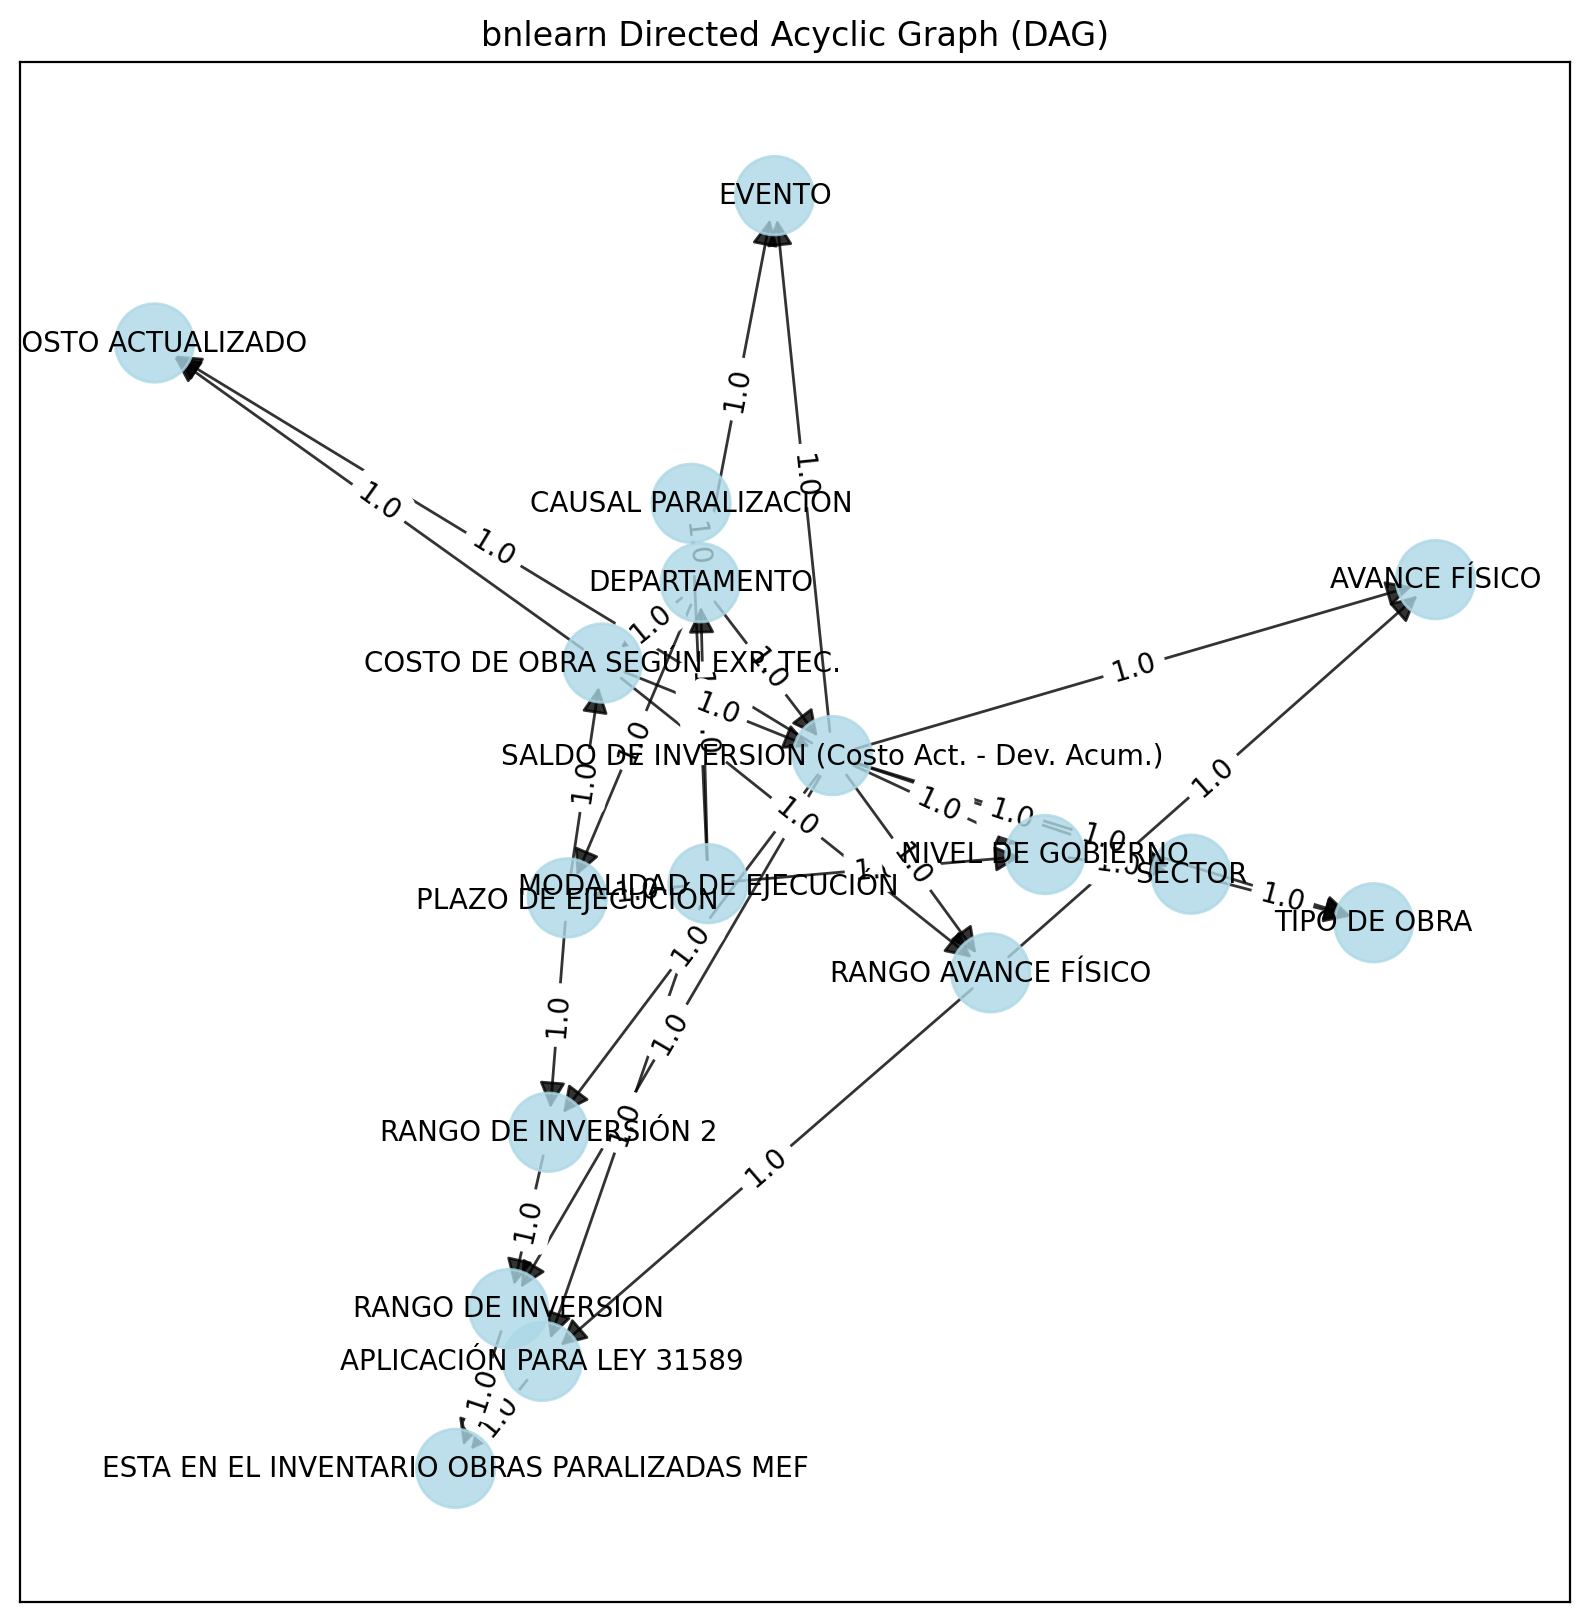

In [54]:
import bnlearn as bn
# Structure learning
# Limit the number of parents to 2
max_parents = 2
# Perform structure learning with limited number of parents and sampled data
DAG = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2', max_indegree=max_parents, verbose=3)


# Plot
#G = bn.plot(DAG)
G = bn.plot(DAG)

In [55]:
# Parameter learning
model = bn.parameter_learning.fit(DAG, df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.


MemoryError: Unable to allocate 1.00 TiB for an array with shape (4520, 30556123) and data type float64

In [56]:
# Make inference

q = bn.inference.fit(model, variables=['class'], evidence={'plas':155.0, 'age':23.0})

print(q.df)
print(q._str())

NameError: name 'model' is not defined

In [ ]:
# Structure learning
# Limit the number of parents to 2
max_parents = 2
# Perform structure learning with limited number of parents and sampled data
DAG_sampled = bn.structure_learning.fit(df_sampled, methodtype='hc', scoretype='k2', max_indegree=max_parents, verbose=3)


# Plot
#G = bn.plot(DAG)
G_sampled = bn.plot(DAG_sampled)

In [ ]:
# Parameter learning
model_sampled = bn.parameter_learning.fit(DAG_sampled, df_sampled)

In [ ]:
# Make inference

q = bn.inference.fit(model_sampled, variables=['class'], evidence={'plas_1.0':True, 'age_1.0':True})

print(q.df)
print(q._str())